![](https://i.loli.net/2018/05/07/5af0400fe9c67.png)

# 机器学习之集成学习实战：再探波士顿房价

算法： 
- AdaBoost
- RandomForest

目录： 
- Step1: 波士顿房价数据集简介
- Step2: 线性回归复习
- Step3: AdaBoost实战
- Step4: RandomForest实战
- Step5: 分类问题实战
- Step6: 总结

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import load_boston

%matplotlib inline

## Step1: 波士顿房价数据集简介

In [2]:
print(load_boston()['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
load_boston()['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston_df = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])
boston_df['target'] = load_boston()['target']

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


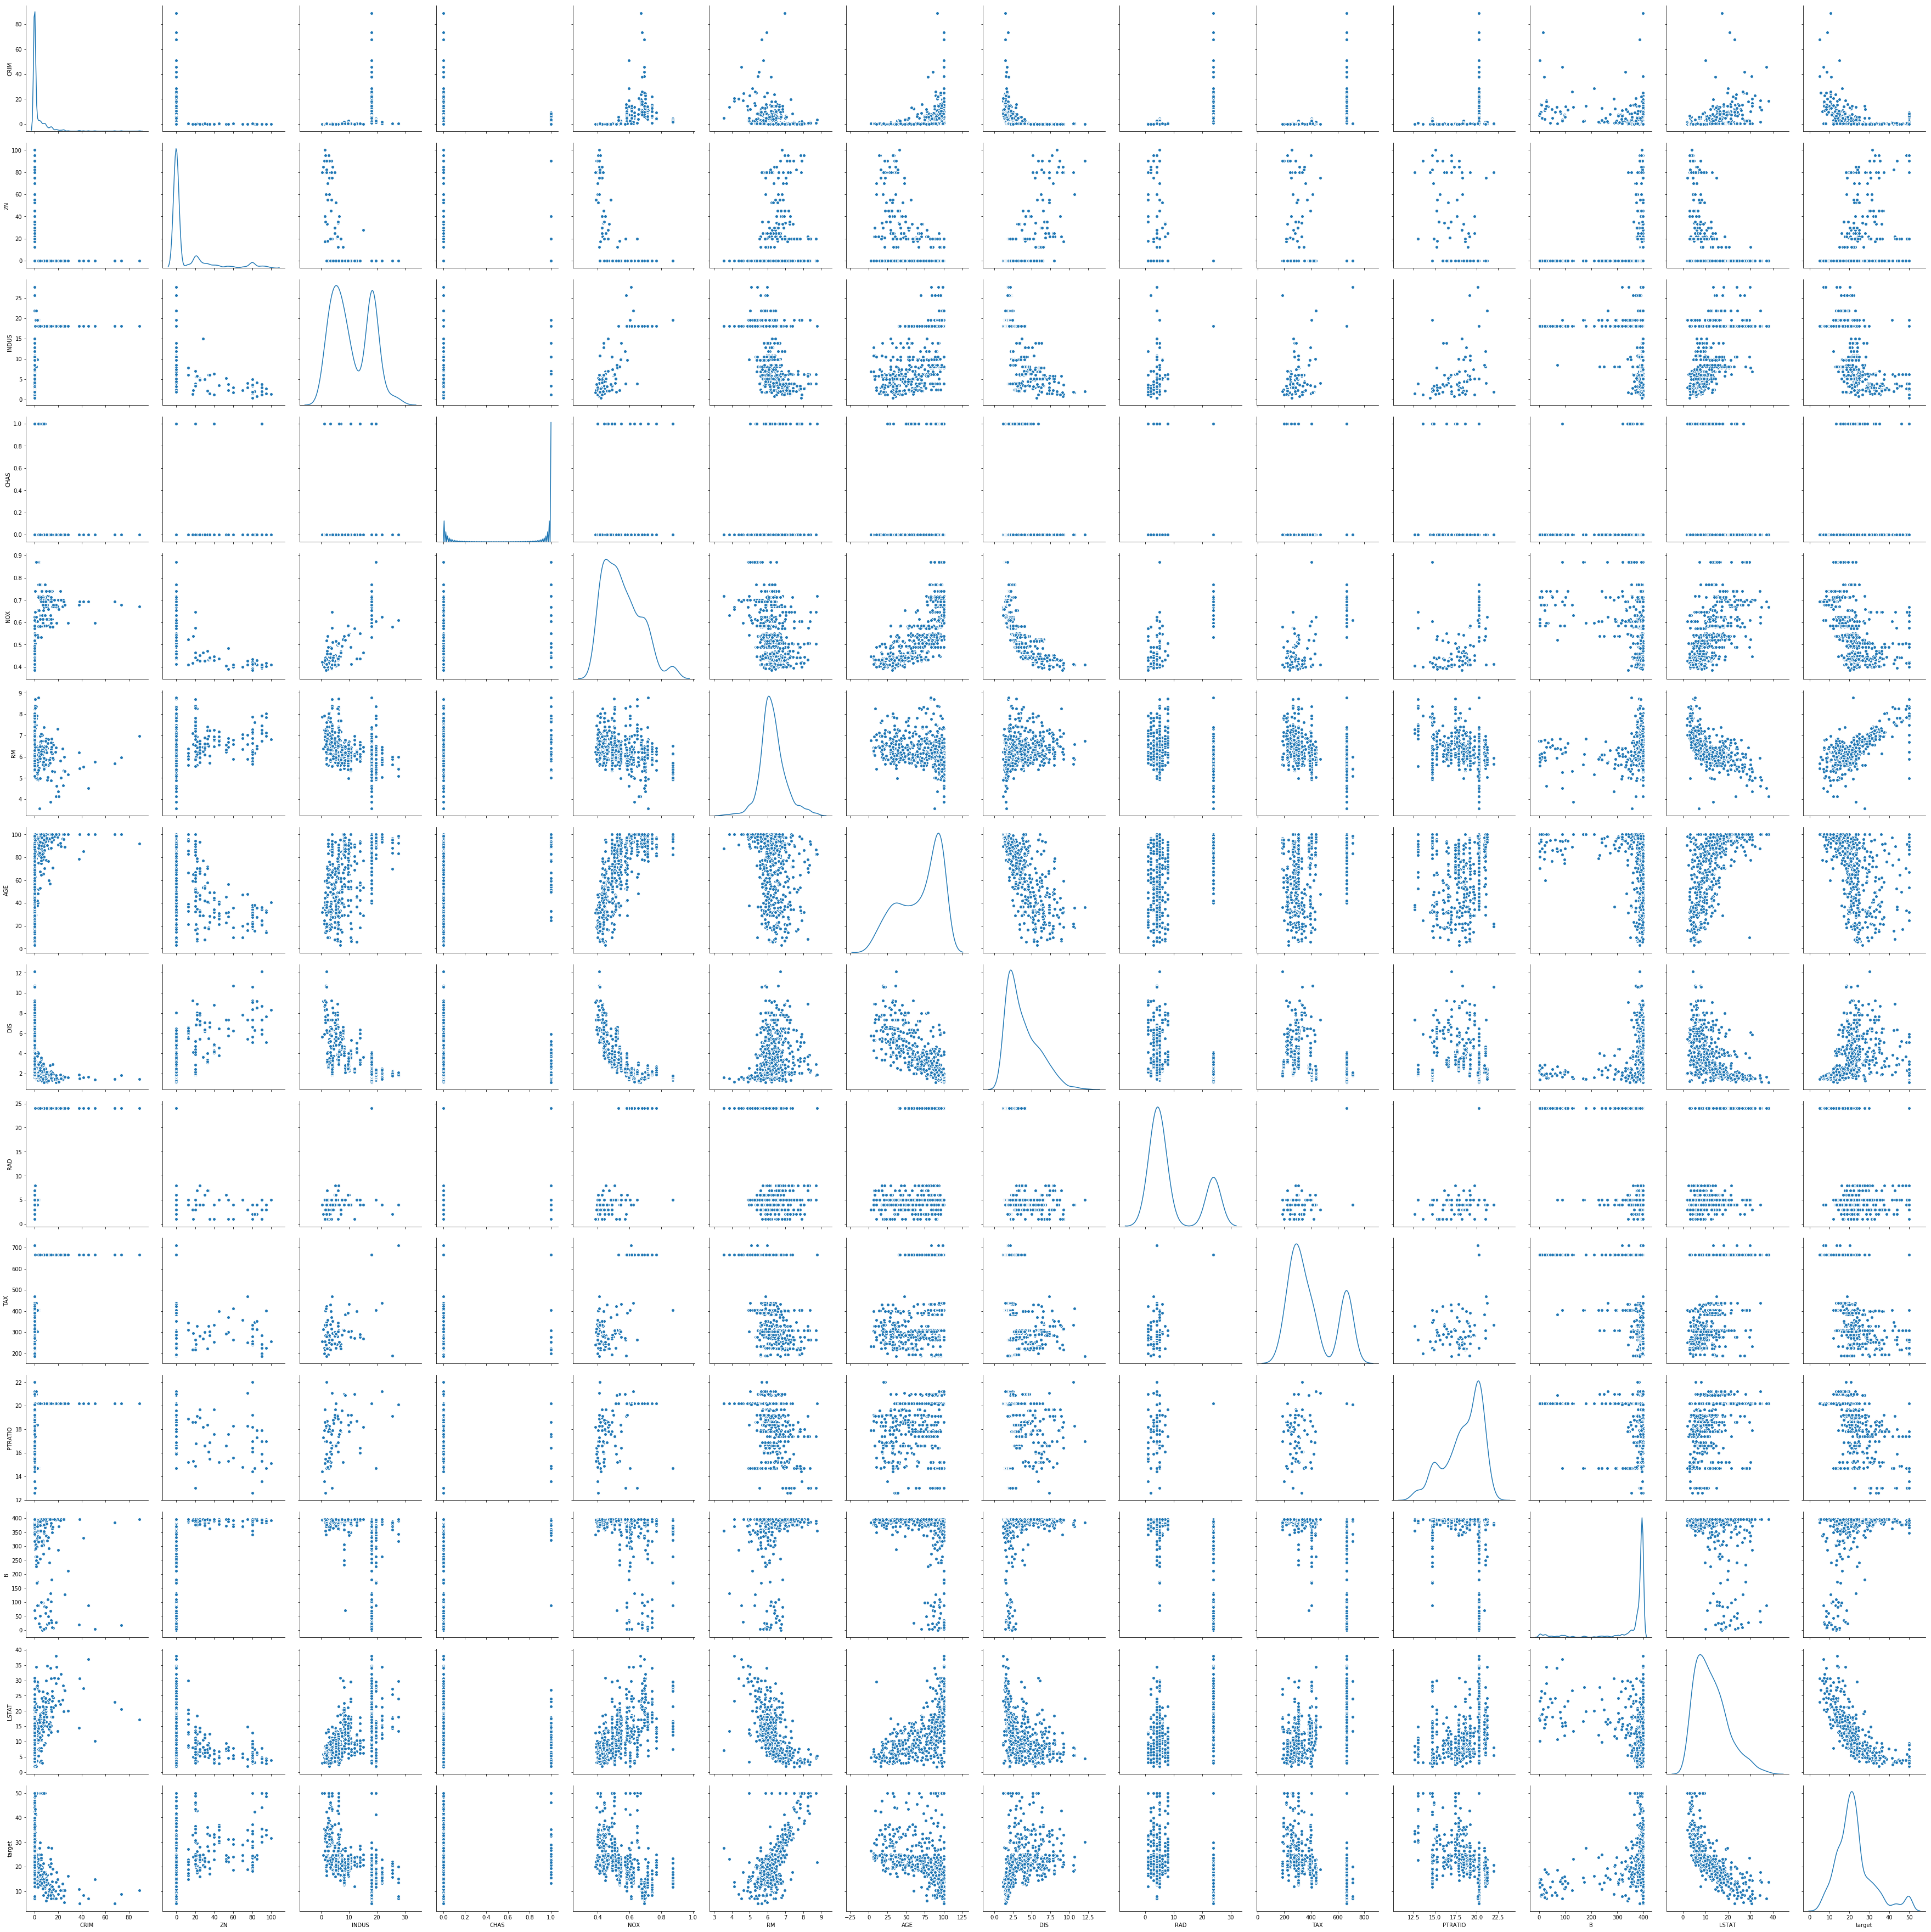

In [7]:
sns.pairplot(boston_df, size=3.5, diag_kind='kde')

In [8]:
y_train = boston_df['target'].values
boston_train_df = boston_df.drop('target', axis=1)
X_train = boston_train_df.values

## Step2: 线性回归复习

In [9]:
from sklearn.preprocessing import minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
X_train_scale = minmax_scale(X_train)
lr = LinearRegression()
lr.fit(X_train_scale, y_train)
y_pred_lr = lr.predict(X_train_scale)

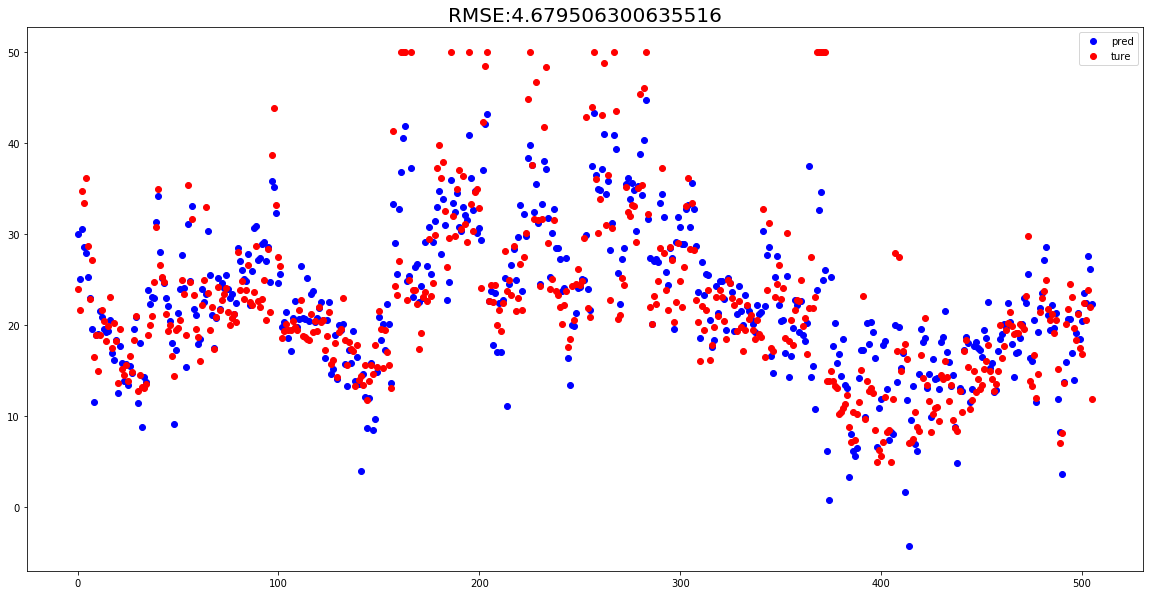

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
lr_rmse = np.sqrt(mean_squared_error(y_pred_lr, y_train))
ax.plot(range(len(y_pred_lr)), y_pred_lr, 'bo', label='pred')
ax.plot(range(len(y_train)), y_train, 'ro', label='ture')
ax.set_title('RMSE:' + str(lr_rmse), fontsize=20)
plt.legend()
plt.show()

## Step3: adaboost实战

In [12]:
abr = AdaBoostRegressor(n_estimators=200, learning_rate=0.1)
abr.fit(X_train, y_train)
y_pred_ada = abr.predict(X_train)

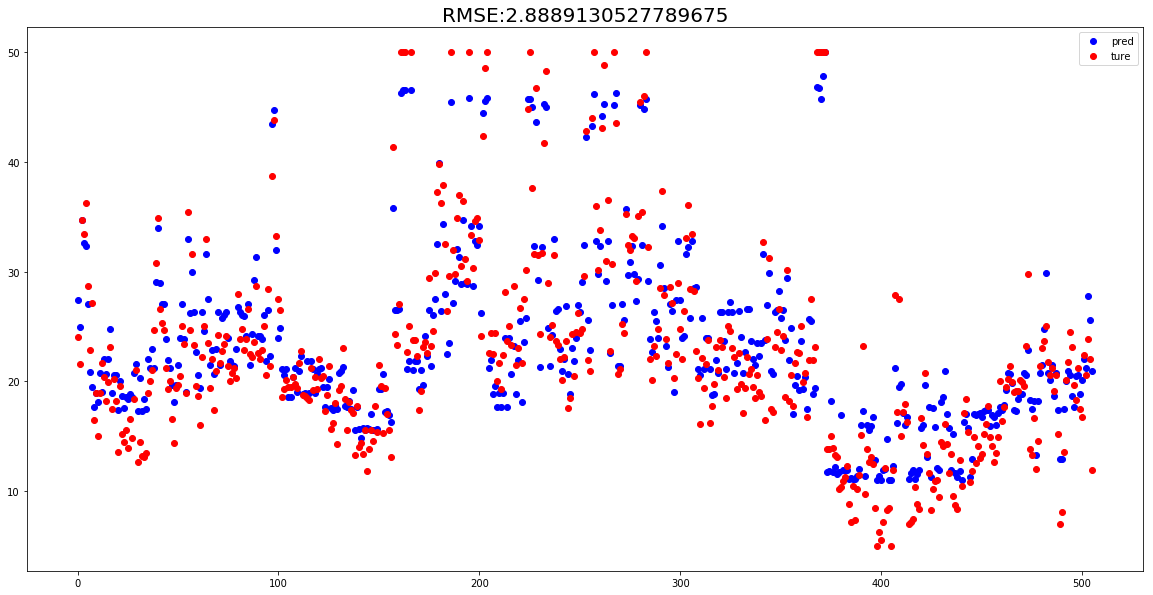

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
ada_rmse = np.sqrt(mean_squared_error(y_pred_ada, y_train))
ax.set_title('RMSE:' + str(ada_rmse), fontsize=20)
ax.plot(range(len(y_pred_ada)), y_pred_ada, 'bo', label='pred')
ax.plot(range(len(y_train)), y_train, 'ro', label='ture')
plt.legend()
plt.show()

## Step4: random forest实战

In [14]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred_rf = rfr.predict(X_train)

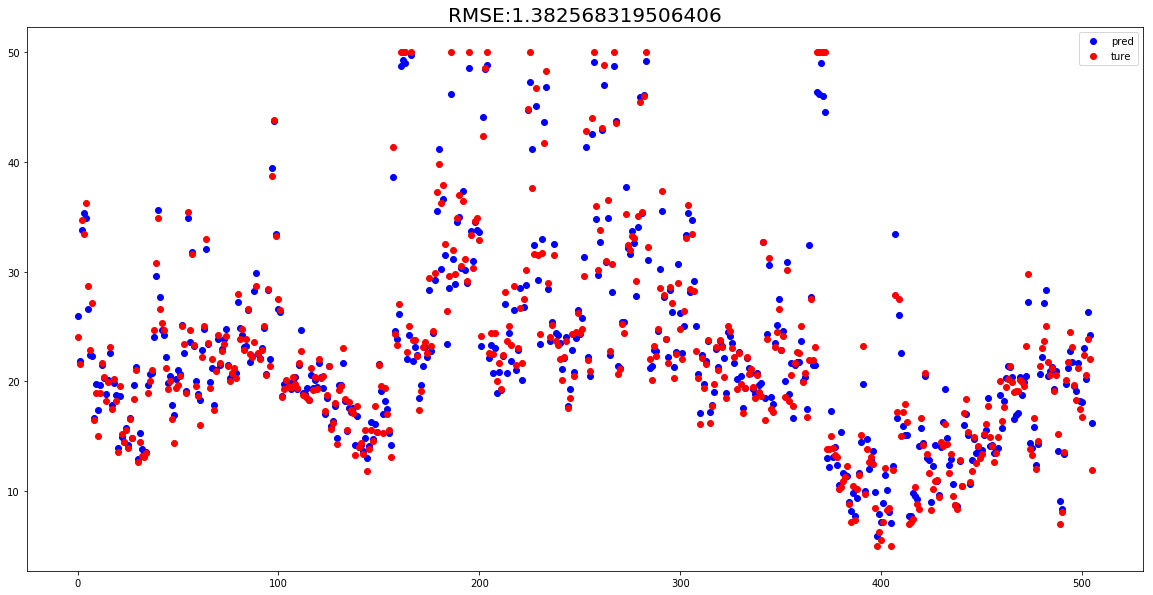

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
rf_rmse = np.sqrt(mean_squared_error(y_pred_rf, y_train))
ax.set_title('RMSE:' + str(rf_rmse), fontsize=20)
plt.plot(range(len(y_pred_rf)), y_pred_rf, 'bo', label='pred')
plt.plot(range(len(y_train)), y_train, 'ro', label='ture')
plt.legend()
plt.show()

画出散点图进行对比

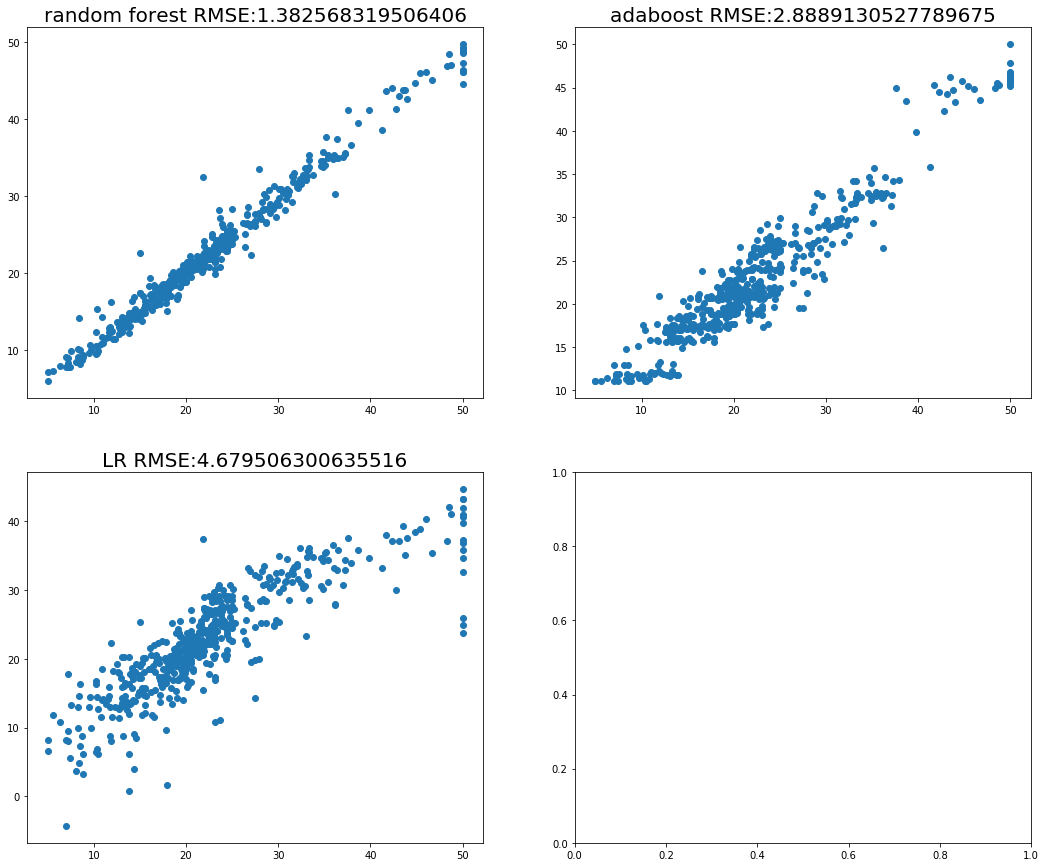

In [18]:
fig, ax = plt.subplots(2,2, figsize=(18,15))
ax[0, 0].scatter(y_train, y_pred_rf)
ax[0, 0].set_title('random forest RMSE:' + str(rf_rmse), fontsize=20)
ax[0, 1].scatter(y_train, y_pred_ada)
ax[0, 1].set_title('adaboost RMSE:' + str(ada_rmse), fontsize=20)
ax[1, 0].scatter(y_train, y_pred_lr)
ax[1, 0].set_title('LR RMSE:' + str(lr_rmse), fontsize=20)
plt.show()

## Step5 分类问题实战

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X_cancer = load_breast_cancer()['data']
y_cancer = load_breast_cancer()['target']
X_train, X_test, y_train, y_test = train_test_split(
          X_cancer, y_cancer, test_size=0.33, random_state=300)

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('svm分类准确率:')
print(np.mean(y_pred == y_test))

svm分类准确率:
0.9574468085106383


In [23]:
adc = AdaBoostClassifier()
adc.fit(X_train, y_train)
y_pred = adc.predict(X_test)
print('adaboost分类准确率:')
print(np.mean(y_pred == y_test))

adaboost分类准确率:
0.973404255319149


In [32]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('random forest分类准确率:')
print(np.mean(y_pred == y_test))

random forest分类准确率:
0.9361702127659575


## Step6 总结
- 集成学习在实践中应用非常广泛，往往能够取得比单个模型更佳的效果
- boosting算法对异常点比较敏感，adaboost在回归问题上的表现一般，不太需要调参
- random forest的结果有一定随机性，一般需要调参才能得到更好的效果

## 作业：请用以前所学的知识对random forest进行调参，并对比之前未调参的结果